In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from json import load
import tifffile
from tqdm import tqdm
from skimage.draw import polygon
from matplotlib import rcParams
import glasbey

palette = {
    "orange": "#D17847",
    "blue": "#4F658C",
    "red": "#A83533",
    "green-light": "#44704B",
    "green-dark": "#1F5234",
    "beige": "#D4CCBE",
    "dark-beige": "#B5A47B",
    "black": "#0E0E0E",
    "brown": "#614B29",
    "white": "#FFFFFF"
}

rcParams['font.family'] = 'sans-serif'
rcParams['figure.facecolor'] = "#FFFFFF00"
rcParams['axes.facecolor'] = "#FFFFFF00"
rcParams['legend.facecolor'] = palette["beige"]
rcParams['legend.framealpha'] = 0.5
rcParams['grid.color'] = palette["beige"]
rcParams['grid.alpha'] = 0.5
rcParams['axes.edgecolor'] = palette["black"]

sns.set_context("paper")

rcParams["font.size"] = 18
rcParams["legend.fontsize"] = 10
rcParams["axes.labelsize"] = 12
s_palette = sns.cubehelix_palette(as_cmap=True)

datapath = Path().cwd().parent.parent / "data" / "interim" / "external" 
plotpath = Path().cwd().parent.parent / "figures" / "information_theory"
plotpath.mkdir(exist_ok=True, parents=True)

In [3]:
from skimage.measure import regionprops_table

bursts = tifffile.imread(datapath / "bothma2014" / "bursts.tif")[:150]
masks = tifffile.imread(datapath / "bothma2014" / "nuclei_cyto3masks.tif")[:150]
a = np.arange(len(masks))

masks = np.add(np.expand_dims(10000*a, [-1, -2]), masks) * (masks > 0)
print(masks)

df = pd.DataFrame(regionprops_table(masks, intensity_image=bursts, properties=("label", "area", "max_intensity", "min_intensity", "mean_intensity", "centroid")))


[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [4]:
df["total_intensity"] = df["area"] * df["mean_intensity"]

# delete rows with high intensity
df = df[df["max_intensity"] < 150]
# sns.kdeplot(data=df, x="area", y="max_intensity")
print(sum(df["total_intensity"] > 100) / len(df))
# sns.kdeplot(df, x="total_intensity", bw_adjust=0.2)
# plt.show()
df["val"] = df["max_intensity"] > 17
# sns.scatterplot(data=df, x="centroid-2",y="centroid-1", hue="val", palette=[palette["black"], palette["white"]], s=0.2)
# plt.savefig(plotpath / "nuclei_bursts.png", dpi=300)

0.1078972318500443


In [5]:
sum([0.36, 0.51, 0.11, 0.11]) * 50

54.50000000000001

In [6]:
chars = ["a", "b", "c", "d"]
probs = [0.7, 0.26, 0.02, 0.02]
enc_1 = ["00", "01", "10", "11"]
enc_2 = ["0", "10", "110", "111"]

vals = np.random.choice(np.arange(4), 50, p=probs)
seq1 = "".join([chars[v] for v in vals])
seq2 = "".join([enc_1[v] for v in vals])
seq3 = "".join([enc_2[v] for v in vals])
print(seq1, len(seq1))
print(seq2, len(seq2))
print(seq3, len(seq3))


abbaabcbaabaacaaabbaaabbaaaaaaaaaabaabbabaaaaaaaba 50
0001010000011001000001000010000000010100000001010000000000000000000001000001010001000000000000000100 100
01010001011010001000110000101000010100000000000100010100100000000100 68


In [7]:
# from skimage.measure import regionprops_table, regionprops
# output_video = np.zeros_like(masks)
# 
# for i, frame in tqdm(enumerate(masks)):
#     for prop in regionprops(frame, intensity_image=bursts[i]):
#         val = (prop.max_intensity) > 17
#         output_video[i, prop.coords[:, 0], prop.coords[:, 1]] = val + 1
#         
# tifffile.imwrite(datapath / "bothma2014" / "nuclei_bursts.tif", output_video.astype(np.uint8))

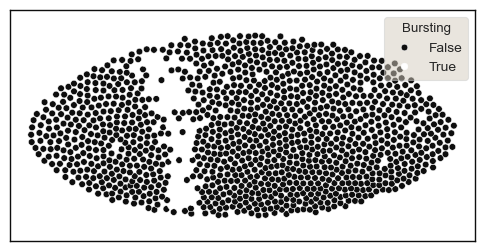

In [8]:
framek = df[df["centroid-0"] == 120]
plt.figure(figsize=(6, 3))

sns.scatterplot(data=framek, x="centroid-2", y="centroid-1", hue="val", palette=[palette["black"], palette["white"]])
plt.axis("equal")
plt.xticks([])
plt.yticks([])
plt.xlabel("")
plt.ylabel("")
plt.legend(title="Bursting", loc="upper right")
plt.savefig(plotpath / "bursting_state.png", dpi=300)

1         0.506591
2         0.630975
3         0.432255
4         0.734081
5         0.676094
            ...   
128951    0.502167
128952    0.522687
128953    0.612564
128954    0.555026
128955    0.582031
Name: x, Length: 128678, dtype: float64
0.336734693877551
98
1.24
conditional_entropy: 0.5723938787059846
mean_entropy: 0.005840753864346781
0.24731182795698925
93
1.4133333333333333
conditional_entropy: 0.3770637797541773
mean_entropy: 0.0040544492446685735
0.07608695652173914
92
1.7733333333333334
conditional_entropy: 0.2006822108470499
mean_entropy: 0.0021813283787722815
0.021739130434782608
92
1.8
conditional_entropy: 0.052163088742896144
mean_entropy: 0.0005669900950314798
0.013245033112582781
151
2.96
conditional_entropy: 0.08557024943703453
mean_entropy: 0.0005666903936227453
0.016483516483516484
182
3.68
conditional_entropy: 0.08800032385943611
mean_entropy: 0.0004835182629639347
0.022857142857142857
175
3.4
conditional_entropy: 0.09712748654930774
mean_entropy: 0.00055501

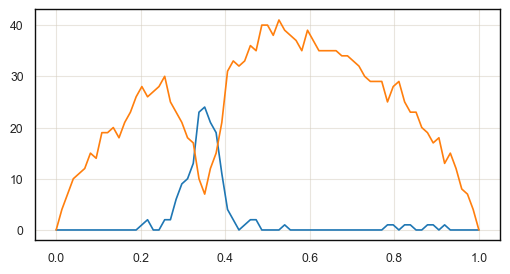

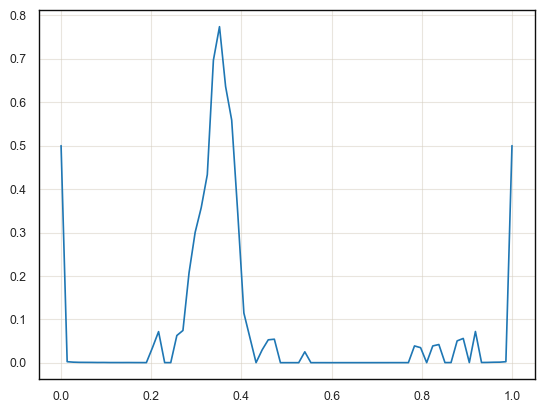

conditional_entropy: 0.20599598732659943
mean_entropy: 0.0001601835049195952
0.07950116913484022
1283
23.733333333333334
conditional_entropy: 0.19215921435704195
mean_entropy: 0.000149773354915855
0.07941403238242097
1297
23.973333333333333
conditional_entropy: 0.22598052315895933
mean_entropy: 0.0001742332483877867
0.0763888888888889
1296
24.106666666666666
conditional_entropy: 0.19463071601412751
mean_entropy: 0.00015017802161583913
0.08012326656394453
1298
24.013333333333332
conditional_entropy: 0.20047027922587818
mean_entropy: 0.00015444551558234067
0.07692307692307693
1300
24.026666666666667
conditional_entropy: 0.2082399765103873
mean_entropy: 0.00016018459731568255
0.0763888888888889
1296
24.226666666666667
conditional_entropy: 0.20632010424007846
mean_entropy: 0.00015919761129635685
0.08326908249807248
1297
24.066666666666666
conditional_entropy: 0.22751119493090646
mean_entropy: 0.00017541341166608053
0.0779320987654321
1296
24.066666666666666
conditional_entropy: 0.198211374

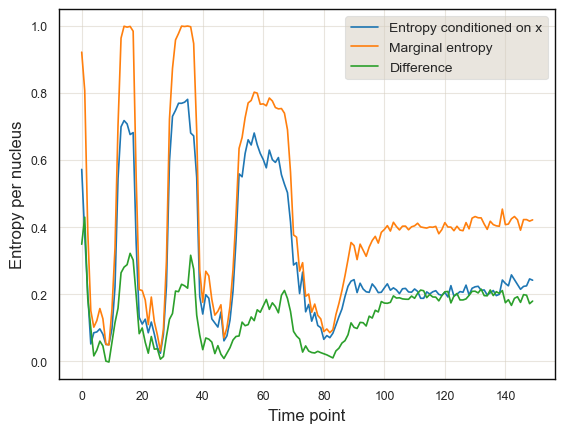

In [9]:
from scipy.stats import gaussian_kde

def shannon_entropy(p):
    return -p*np.log2(p) - (1-p)*np.log2(1-p)

def conditional_entropy(y_x, p_x):
    p_x = p_x / len(p_x)
    out = 0
    
    for y in [y_x, 1-y_x]:
        for i, x in enumerate(p_x):
            if x == 0:
                continue
            out += -y[i]*x * np.log2(y[i])
            
    return out

n_bins = 75
x_min = df["centroid-2"].min()
x_max = df["centroid-2"].max()
df["x"] = (df["centroid-2"] - x_min) / (x_max - x_min)
print(df["x"])
x_space = np.linspace(0, 1, n_bins)

be = {}
entropies = []
frac_true = []
h = 0.02

def flat_kde(pts, xvals, h):
    out = np.zeros_like(xvals)
    index = np.arange(len(xvals))
    for pt in pts:
        ivals = index[(xvals < pt + h / 2) & (xvals > pt - h / 2)]
        out[ivals] += 1
    return out

for t in sorted(df["centroid-0"].unique()):

    this_df = df[df["centroid-0"] == t]
    true_df = this_df[this_df["val"]]
    false_df = this_df[~this_df["val"]]
    
    print(sum(this_df["val"]) / len(this_df))
    print(len(this_df))

    true_vals = flat_kde(true_df["x"], x_space, h)
    false_vals = flat_kde(false_df["x"], x_space, h)
    print(false_vals.mean())
    bern_estimate = (true_vals + 0.01) / (true_vals + false_vals + 0.02)
    
    p_x = flat_kde(this_df["x"], x_space, h)
    p_x = p_x / p_x.sum() * n_bins
    
    if t == 120:
        plt.figure(figsize=(6, 3))
        plt.plot(x_space, true_vals, label="True")
        plt.plot(x_space, false_vals, label="False")
        plt.show()
        
        plt.plot(x_space, bern_estimate, label="Bernoulli")
        plt.show()
    
    tot = conditional_entropy(bern_estimate, p_x)
    print(f"conditional_entropy: {tot}")
    print(f"mean_entropy: {tot / len(this_df)}")
    
    entropies.append(tot)
    frac_true.append(sum(this_df["val"]) / len(this_df))
    
    be[t] = bern_estimate
    
plt.plot(entropies, label="Entropy conditioned on x")
plt.plot(shannon_entropy(np.array(frac_true)+0.0001), label="Marginal entropy")
plt.plot(shannon_entropy(np.array(frac_true)+0.0001) - entropies, label="Difference")
plt.legend()
plt.xlabel("Time point")
plt.ylabel("Entropy per nucleus")
plt.savefig(plotpath / "nuclei_bursts_entropy.png", dpi=300)
plt.show()

# print(shannon_entropy(be["x"]) / n_bins)
# print(shannon_entropy(be["x_new"]) / n_bins)
# kld = np.sum((be["x"]*np.log2(be["x"]/be["x_new"]) + (1-be["x"])*np.log2((1-be["x"])/(1-be["x_new"]))) / n_bins)
# kld2 = np.sum((be["x_new"]*np.log2(be["x_new"]/be["x"]) + (1-be["x_new"])*np.log2((1-be["x_new"])/(1-be["x"]))) / n_bins)
# print(kld)
# print(kld2)

In [10]:
p = 0.99
n = 30

for p in [0.01, 0.5, 0.99]:
    for i in range(3):
        plt.figure(figsize=(3, 3))
        arr = np.random.uniform(0, 1, (n, n)) < p
        plt.imshow(arr, cmap="gray", vmin=0, vmax=1)
        plt.yticks([])
        plt.xticks([])
        
        plt.tight_layout()
        plt.savefig(plotpath / f"random_matrix_{p}_{n}_{i}.png", dpi=300)
        plt.close()
        

p = 0.01

p_arr = [p] * (n // 3) + [1 - p] * (n - 2*(n // 3)) + [p] * (n // 3)

for i in range(3):
    plt.figure(figsize=(3, 3))
    arr = np.random.uniform(0, 1, (n, n)) < p_arr
    plt.imshow(arr, cmap="gray", vmin=0, vmax=1)
    plt.yticks([])
    plt.xticks([])
    
    plt.savefig(plotpath / f"random_stripe_{n}_{i}.png", dpi=300)
    plt.close()

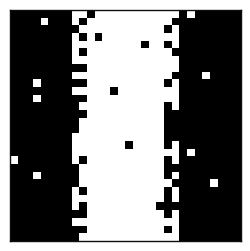

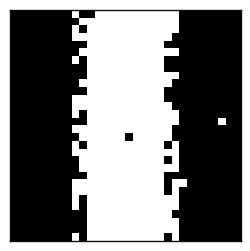

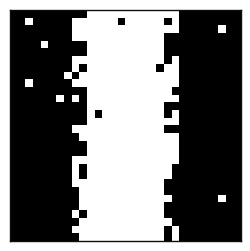

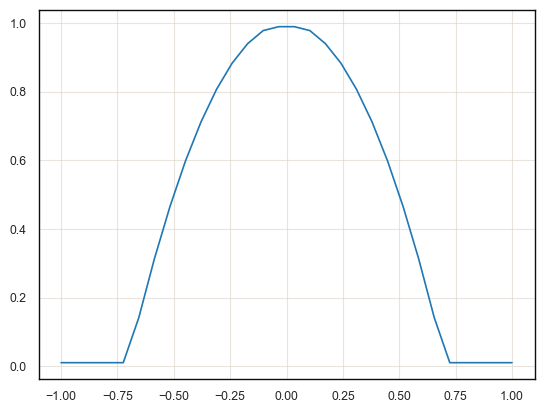

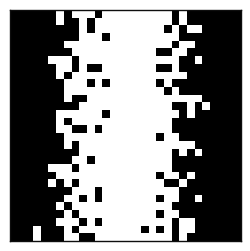

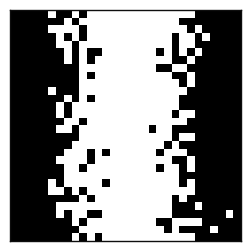

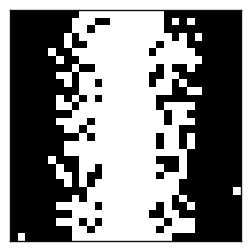

In [11]:
p_arr = [0.01]*8 + [0.5] * 2 + [0.99]* 5
p_arr = p_arr + p_arr[::-1]

for i in range(3):
    plt.figure(figsize=(3, 3))
    arr = np.random.uniform(0, 1, (n, n)) < p_arr
    plt.imshow(arr, cmap="gray", vmin=0, vmax=1)
    plt.yticks([])
    plt.xticks([])
    
    plt.savefig(plotpath / f"noisy_stripe_{n}_{i}.png", dpi=300)
    plt.show()
    
x = np.linspace(-1, 1, n)
p_arr = np.clip(-2*x**2 + 1, 0.01, 0.99)

plt.plot(x, p_arr)

for i in range(3):
    plt.figure(figsize=(3, 3))
    arr = np.random.uniform(0, 1, (n, n)) < p_arr
    plt.imshow(arr, cmap="gray", vmin=0, vmax=1)
    plt.yticks([])
    plt.xticks([])
    
    plt.savefig(plotpath / f"noisy_stripe_{n}_{i}.png", dpi=300)
    plt.show()

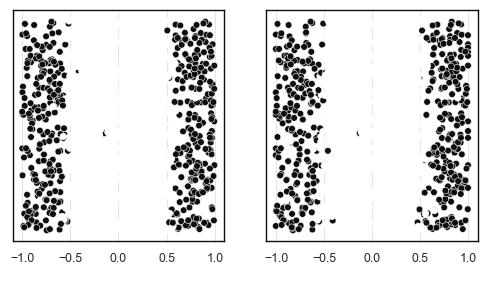

In [24]:
n_points = 1000
pt_x = np.random.uniform(-1, 1, n_points)
pt_y = np.random.uniform(-1, 1, n_points)
pt_x_new = np.clip(pt_x + np.random.normal(0, 0.05, n_points), -1, 1)
x_prob = np.clip(-8*pt_x**2 + 3, 0.01, 0.99)
x_val = np.random.uniform(0, 1, n_points) < x_prob

df = pd.DataFrame({"x": pt_x, "x_new": pt_x_new, "p": x_prob, "val": x_val, "y": pt_y})
df["xbin_new"] = pd.cut(df["x_new"], bins=np.linspace(-1, 1, 21))
df["xbin"] = pd.cut(df["x"], bins=np.linspace(-1, 1, 21))

fig, axes = plt.subplots(1, 2, figsize=(6, 3))

# sns.histplot(df, x="x", hue="val", bins=20, palette=[palette["black"], palette["white"]], multiple="fill", ax=axes[1, 0], legend=False)
# 
# sns.histplot(df, x="x_new", hue="val", bins=20, palette=[palette["black"], palette["white"]], multiple="fill", ax=axes[1, 1], legend=False)

sns.scatterplot(data=df, x="x", y="y", hue="val", palette=[palette["black"], palette["white"]], ax=axes[0], legend=False)
axes[0].set_xlabel("")
axes[1].set_xlabel(" ")
axes[0].set_ylabel("")
axes[0].set_yticks([])
axes[1].set_yticks([])

sns.scatterplot(data=df, x="x_new", y="y", hue="val", palette=[palette["black"], palette["white"]], ax=axes[1], legend=False)
plt.savefig(plotpath / "noisy_stripe_new_scatter.png", dpi=300)
plt.show()

0.55266
50000
551.41
conditional_entropy: 0.11851496991900157
0.55266
50000
533.685
conditional_entropy: 0.3029486990281509
KL Divergence: 0.07028515240833269
KL Divergence: 0.2285233132232277


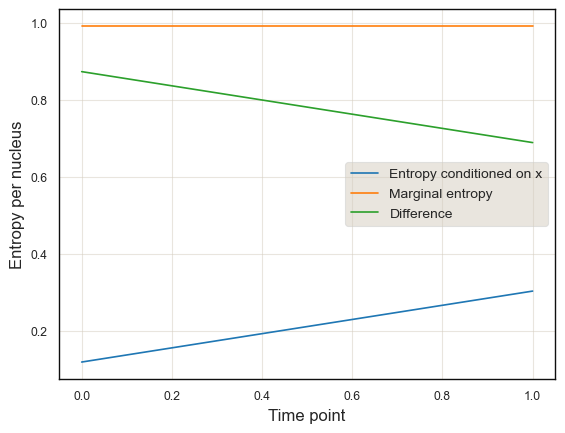

[1.33514468e-06 9.72603503e-07 7.64301994e-07 4.59153452e-05
 4.57293667e-05 4.60089372e-05 4.69023799e-05 8.79102749e-05
 4.89467368e-05 8.85372180e-05 8.94957205e-05 8.79102749e-05
 4.78674099e-05 8.46817204e-05 4.70986436e-05 4.70986436e-05
 4.80038351e-05 4.71315237e-05 7.18553297e-07 7.42073633e-07
 4.70658121e-05 8.47392140e-05 8.55529508e-05 8.65637450e-05
 8.32155104e-05 4.73298313e-05 7.41521313e-07 4.71644526e-05
 8.65637450e-05 8.55529508e-05 8.49121952e-05 8.32709029e-05
 4.55143998e-05 7.05368365e-07 7.02396723e-07 4.45875841e-05
 8.13777514e-05 3.81401231e-04 9.67810951e-04 1.98574589e-03
 2.93453367e-03 3.87269624e-03 4.50800718e-03 4.89373501e-03
 4.99729884e-03 4.80150705e-03 4.37932335e-03 3.63363273e-03
 2.73225821e-03 1.79465776e-03 1.21297750e-03 5.55096835e-04
 8.39982229e-05 8.55529508e-05 1.23943315e-04 1.25521777e-04
 1.63816501e-04 1.62297542e-04 1.95046725e-04 1.89325114e-04
 1.55978673e-04 1.56618912e-04 1.22491002e-04 3.10125909e-04
 3.14980169e-04 3.215646

In [35]:
from scipy.stats import gaussian_kde
xbin_vals = []
xbin_new_vals = []
n_bins = 40

n_points = 50000
pt_x = np.random.uniform(-1, 1, n_points)
pt_x_new = np.clip(pt_x + np.random.normal(0, 0.1, n_points), -1, 1)
x_prob = np.clip(-8*pt_x**2 + 3, 0.001, 0.995)
x_val = np.random.uniform(0, 1, n_points) < x_prob

df = pd.DataFrame({"x": pt_x, "x_new": pt_x_new, "p": x_prob, "val": x_val})
df["xbin_new"] = pd.cut(df["x_new"], bins=np.linspace(-1, 1, n_bins + 1))
df["xbin"] = pd.cut(df["x"], bins=np.linspace(-1, 1, n_bins + 1))


def shannon_entropy(p):
    return -p*np.log2(p) - (1-p)*np.log2(1-p)

def conditional_entropy(y_x, p_x):
    p_x = p_x / len(p_x)
    out = 0
    
    for y in [y_x, 1-y_x]:
        for i, x in enumerate(p_x):
            if x == 0:
                continue
            out += -y[i]*x * np.log2(y[i])
            
    return out

def kl_divergence(p_y_x, q_y_x, p_x):
    p_x = p_x / len(p_x)
    out = 0
    for py, pq in zip([p_y_x, 1-p_y_x], [q_y_x, 1-q_y_x]):
        for i, x in enumerate(p_x):
            if x == 0:
                continue
            out += py[i]* x * np.log2(py[i] / pq[i])

    return out

n_bins = 200
x_space = np.linspace(-1, 1, n_bins)

be = {}
px_vals = {}
entropies = []
frac_true = []
h = 0.05

def flat_kde(pts, xvals, h):
    out = np.zeros_like(xvals)
    index = np.arange(len(xvals))
    for pt in pts:
        ivals = index[(xvals < pt + h / 2) & (xvals > pt - h / 2)]
        out[ivals] += 1
    return out

for x in ["x", "x_new"]:

    this_df = df.copy()
    true_df = this_df[this_df["val"]]
    false_df = this_df[~this_df["val"]]
    
    print(sum(this_df["val"]) / len(this_df))
    print(len(this_df))

    true_vals = flat_kde(true_df[x], x_space, h)
    false_vals = flat_kde(false_df[x], x_space, h)
    print(false_vals.mean())
    bern_estimate = (true_vals + 0.01) / (true_vals + false_vals + 0.02)
    
    p_x = flat_kde(this_df["x"], x_space, h)
    p_x = p_x / p_x.sum() * n_bins
        
    tot = conditional_entropy(bern_estimate, p_x)
    print(f"conditional_entropy: {tot}")
    
    entropies.append(tot)
    frac_true.append(sum(this_df["val"]) / len(this_df))
    
    be[x] = bern_estimate
    px_vals[x] = p_x
    
print(f'KL Divergence: {kl_divergence(be["x"], be["x_new"], px_vals["x"])}')
print(f'KL Divergence: {kl_divergence(be["x_new"], be["x"], px_vals["x"])}')
    
plt.plot(entropies, label="Entropy conditioned on x")
plt.plot(shannon_entropy(np.array(frac_true)+0.0001), label="Marginal entropy")
plt.plot(shannon_entropy(np.array(frac_true)+0.0001) - entropies, label="Difference")
plt.legend()
plt.xlabel("Time point")
plt.ylabel("Entropy per nucleus")
plt.savefig(plotpath / "nuclei_bursts_entropy.png", dpi=300)
plt.show()

print(shannon_entropy(be["x"]) / n_bins)
print(shannon_entropy(be["x_new"]) / n_bins)
kld = np.sum((be["x"]*np.log2(be["x"]/be["x_new"]) + (1-be["x"])*np.log2((1-be["x"])/(1-be["x_new"]))) / n_bins)
kld2 = np.sum((be["x_new"]*np.log2(be["x_new"]/be["x"]) + (1-be["x_new"])*np.log2((1-be["x_new"])/(1-be["x"]))) / n_bins)
print(kld)
print(kld2)
    
    


# sns.kdeplot(df, x="x_new", hue="val", palette=[palette["black"], palette["white"]], multiple="fill", bw_adjust=0.2)
# plt.show()
# sns.kdeplot(df, x="x", hue="val", palette=[palette["black"], palette["white"]], multiple="fill", bw_adjust=0.2)
# plt.show()

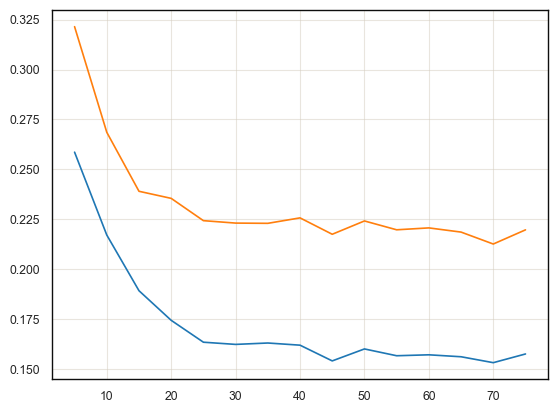

In [14]:
out_x = []
out_new_x = []
n_bin_vals = np.arange(5, 80, 5)

for n_bins in n_bin_vals:

    xbin_vals = []
    xbin_new_vals = []
    
    for k in range(50):
        n_points = 1000
        pt_x = np.random.uniform(-1, 1, n_points)
        pt_x_new = np.clip(pt_x + np.random.normal(0, 0.05, n_points), -1, 1)
        x_prob = np.clip(-8*pt_x**2 + 3, 0.01, 0.99)
        x_val = np.random.uniform(0, 1, n_points) < x_prob
        
        df = pd.DataFrame({"x": pt_x, "x_new": pt_x_new, "p": x_prob, "val": x_val})
        df["xbin_new"] = pd.cut(df["x_new"], bins=np.linspace(-1, 1, n_bins + 1))
        df["xbin"] = pd.cut(df["x"], bins=np.linspace(-1, 1, n_bins + 1))
        
        xbin_vals.append(df.groupby("xbin", observed=True)["val"].mean())
        xbin_new_vals.append(df.groupby("xbin_new", observed=True)["val"].mean())
    
    
    def shannon_entropy(p):
        out = 0
        for p_ in p:
            if p_ == 0 or p_ == 1:
               continue
            out += -p_*np.log2(p_) - (1-p_)*np.log2(1-p_)
        return out
    
    out_x.append(shannon_entropy(np.mean(xbin_vals, axis=0))/n_bins)
    out_new_x.append(shannon_entropy(np.mean(xbin_new_vals, axis=0))/n_bins)
    
plt.plot(n_bin_vals, out_x, label="Original")
plt.plot(n_bin_vals, out_new_x, label="Noisy")

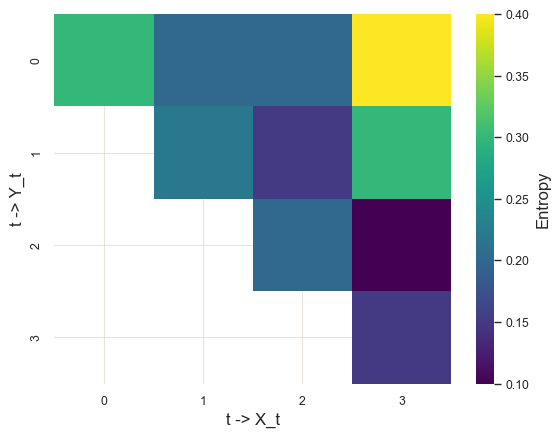

In [46]:
mat = [[0.3, 0.2, 0.2, 0.4],
       [0.0, 0.22, 0.15, 0.30],
       [0.0, 0.0, 0.2, 0.1],
       [0.0, 0.0, 0.0, 0.15]]

mask = np.triu(np.ones_like(mat), k=0)

sns.heatmap(mat, cmap="viridis", mask=1-mask, cbar_kws={"label": "Entropy"})
plt.xlabel("t -> X_t")
plt.ylabel("t -> Y_t")
plt.savefig(plotpath / "entropy_compare.png", dpi=300)